<a href="https://colab.research.google.com/github/hirankaushalya/DL-Lab5/blob/main/It21287022_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [3]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [4]:
# Load Data
file_path = './GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [5]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

In [6]:
# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [7]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [8]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [9]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=60, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=60, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=30, batch_size=42, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 0.3820
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1358
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1259
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1300
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1173
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1015
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1062
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0962
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0982
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0976
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0888
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0870
Epoch 13/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0906
Epoch 14/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0920
Epoch 15/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0899
Epoch 16/30
4/4 ━━━━━━━━━━━━━━━━━━

In [11]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step


In [12]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

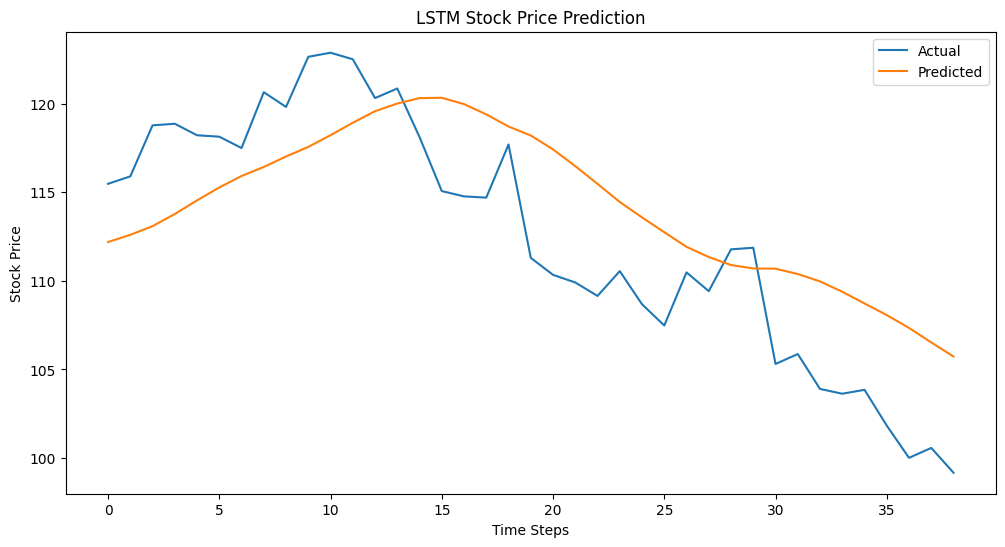

In [13]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()